In [117]:
%matplotlib inline
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import copy

In [118]:
#IMPORT CSV FILE
df=pd.read_csv("HR_Employee_Attrition_Data.csv")
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [119]:
data=copy.deepcopy(df)

In [120]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

## CHECKING FOR MISSING VALUE AND DATA CLEANING

In [121]:
#check for null values
pd.isnull(data).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [122]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [123]:
data.shape

(2940, 35)

In [124]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [125]:
#CHECKING UNIQUE VALUES OF COLUMNS
for column in data.columns:
    if data[column].dtype==object:
        print(column + ":" +data[column].unique())
        print("_______________________________________________________")

['Attrition:Yes' 'Attrition:No']
_______________________________________________________
['BusinessTravel:Travel_Rarely' 'BusinessTravel:Travel_Frequently'
 'BusinessTravel:Non-Travel']
_______________________________________________________
['Department:Sales' 'Department:Research & Development'
 'Department:Human Resources']
_______________________________________________________
['EducationField:Life Sciences' 'EducationField:Other'
 'EducationField:Medical' 'EducationField:Marketing'
 'EducationField:Technical Degree' 'EducationField:Human Resources']
_______________________________________________________
['Gender:Female' 'Gender:Male']
_______________________________________________________
['JobRole:Sales Executive' 'JobRole:Research Scientist'
 'JobRole:Laboratory Technician' 'JobRole:Manufacturing Director'
 'JobRole:Healthcare Representative' 'JobRole:Manager'
 'JobRole:Sales Representative' 'JobRole:Research Director'
 'JobRole:Human Resources']
_____________________________

In [126]:
#DELETING UNNECESSARY OR UNWANTED COLUMNS IN THE DATASET.
#THERE ARE 4 IRRELEVANT COLUMNS,WE HAVE TO REMOVE THESE FOR MORE ACCURACY.
data.drop(['Over18'],axis=1,inplace=True)

In [127]:
#DELETING UNNECESSARY OR UNWANTED COLUMNS
data.drop(["EmployeeCount","EmployeeNumber","StandardHours"],axis=1,inplace=True)

In [128]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [129]:
data.shape

(2940, 31)

In [130]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

In [132]:
data["Attrition"].value_counts()

Attrition
No     2466
Yes     474
Name: count, dtype: int64

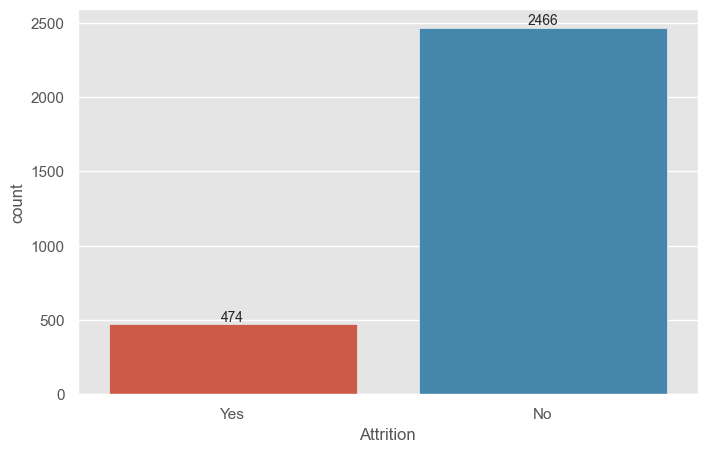

In [133]:
# plotting a bar chart for Attrition and it's count
ax=sns.countplot(x='Attrition',data=data)
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\HP\AppData\Local\Temp\ipykernel_6148\3382645800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

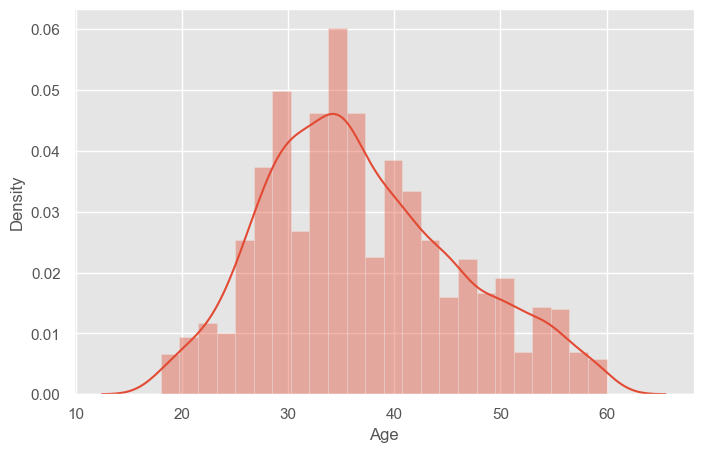

In [134]:
#PLOTTING DISTRIBUTION OF AGE IN THE DATASET
sns.distplot(data["Age"])

<Axes: xlabel='Age', ylabel='count'>

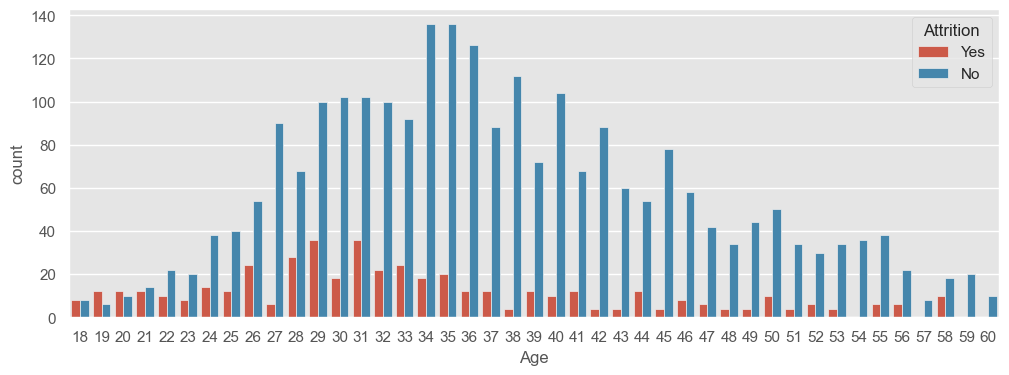

In [135]:
#ploting chart to show the number of employees that left and stayed by age.
plt.subplots(figsize=(12,4))
sns.countplot(x="Age",hue="Attrition",data=data)


According to the above chart,the resulted outcome is that the age with the highest attrition is between age 26-33.

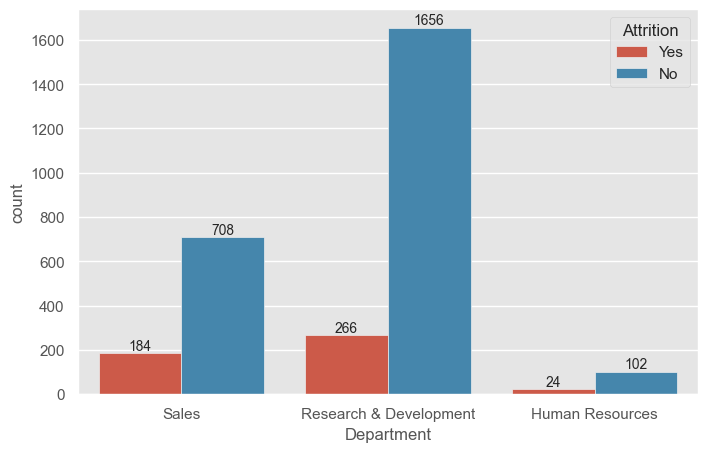

In [136]:
#PLOTTING DEPARTMENT WISE ATTRITION COUNT
plt.subplots(figsize=(8,5))
ax=sns.countplot(data=data,x='Department',hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above charts,the resulted outcome is that most of the employee who left the company are from Research & Development department.And most of the employee working in the company are also from Research & Development department.

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

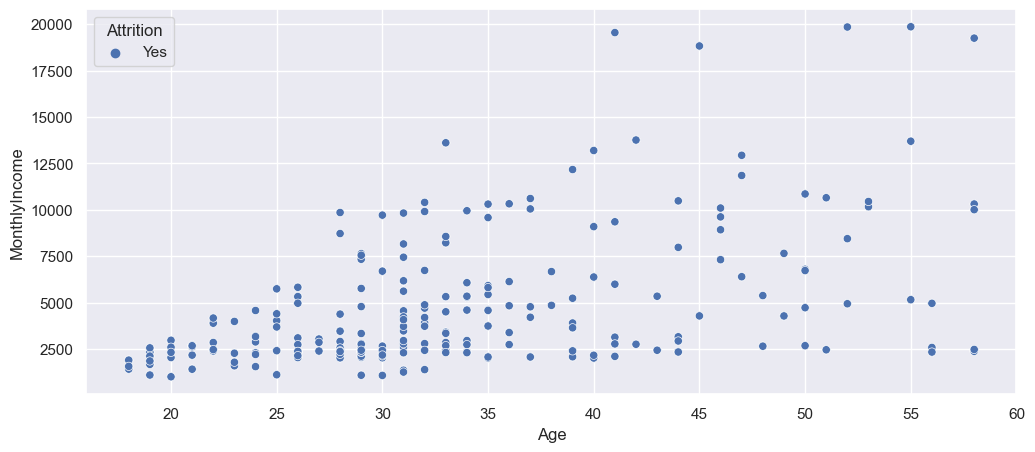

In [137]:
attrition_data=data[data['Attrition']=="Yes"]

sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=attrition_data)

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

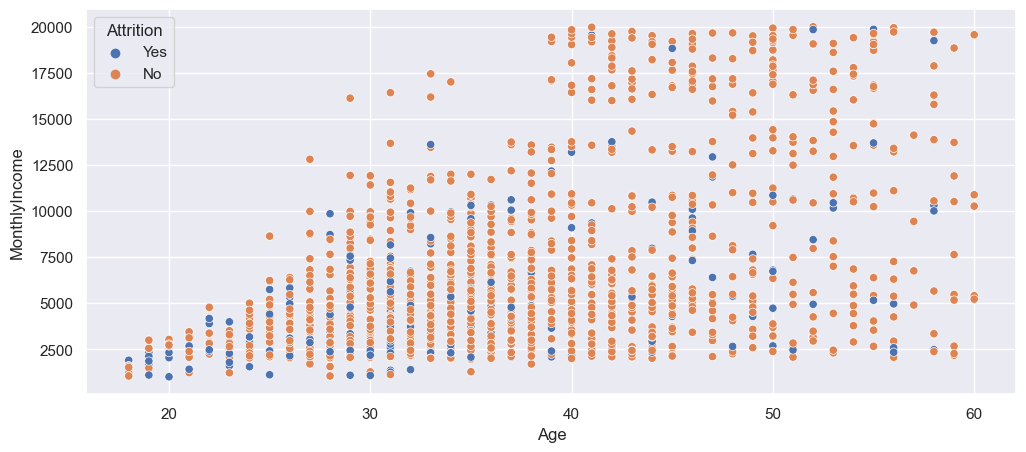

In [138]:
sns.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=data)

According to the above 2 charts ,the resulted outcome is that most of the employee of who left the company of age between 20-35 having salary below 7500 .

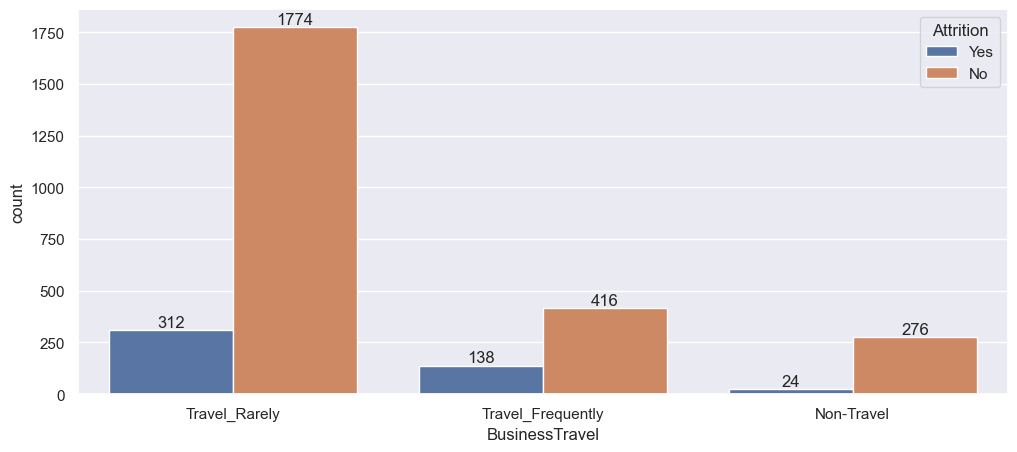

In [139]:
ax=sns.countplot(x='BusinessTravel',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that attrition is high of employee who travel rarely compared to people who don't travel.

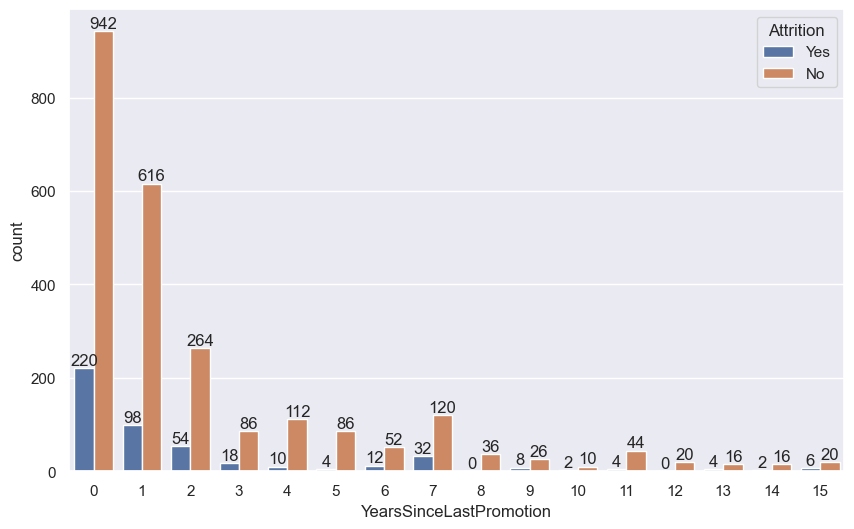

In [140]:
plt.subplots(figsize=(10,6))
ax=sns.countplot(x='YearsSinceLastPromotion',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that attrition level is higher for employees who were not promoted.

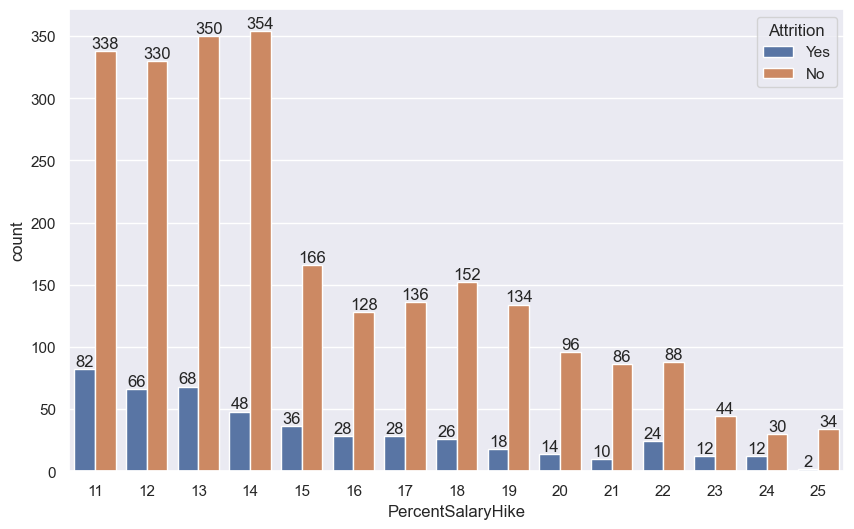

In [141]:
plt.subplots(figsize=(10,6))
ax=sns.countplot(x='PercentSalaryHike',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that attrition level is higher for employees with low percent salary hike of 11-13%.

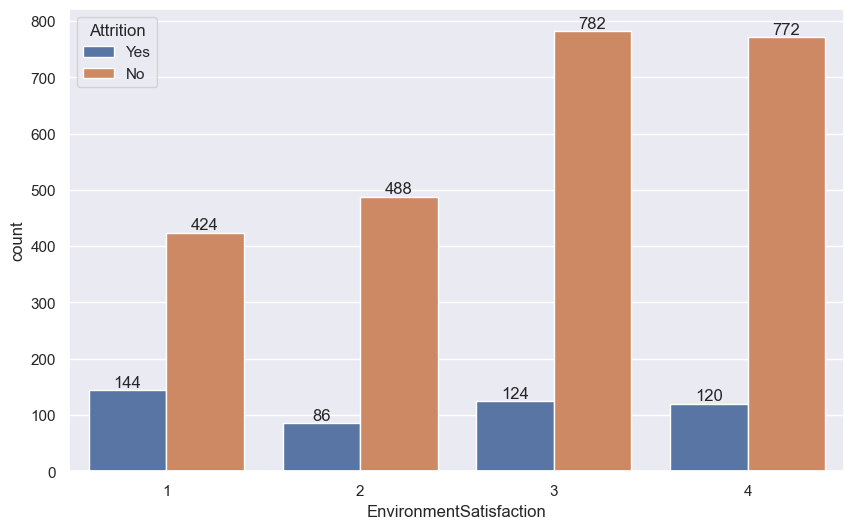

In [142]:
plt.subplots(figsize=(10,6))
ax=sns.countplot(x='EnvironmentSatisfaction',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

from the above figure we can say that attrition is high for people with environment satisfaction 1.

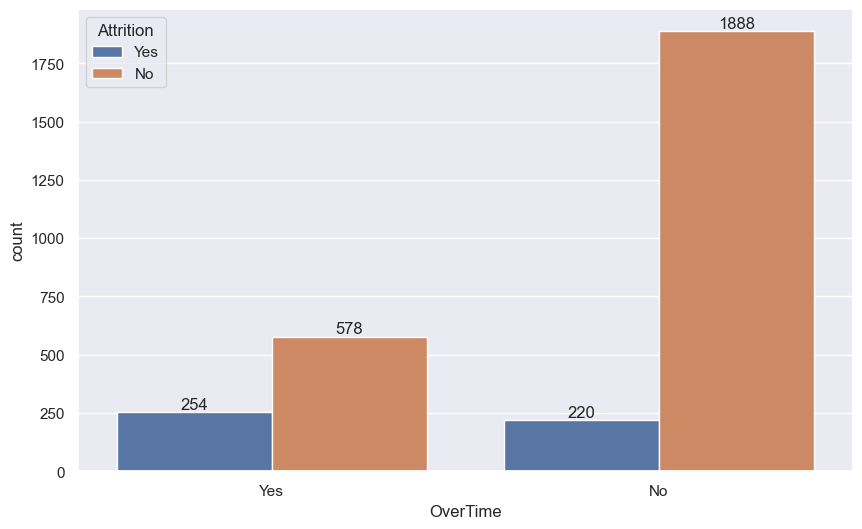

In [143]:
plt.subplots(figsize=(10,6))
ax=sns.countplot(x='OverTime',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

from the above chart we can say that attrition rate is high for employees who have overtime.

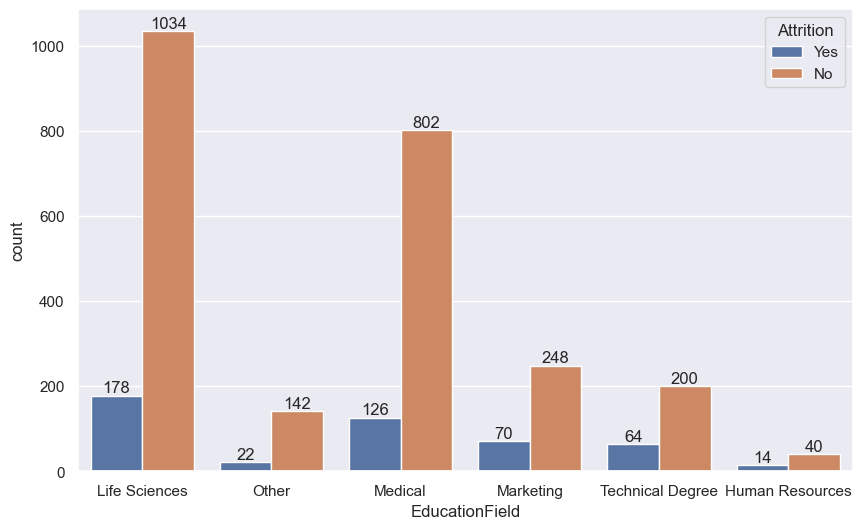

In [144]:
plt.subplots(figsize=(10,6))
ax=sns.countplot(x='EducationField',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that attrition level is higher for employess with life science educational field followed by medical educational field.

<Axes: xlabel='JobRole', ylabel='count'>

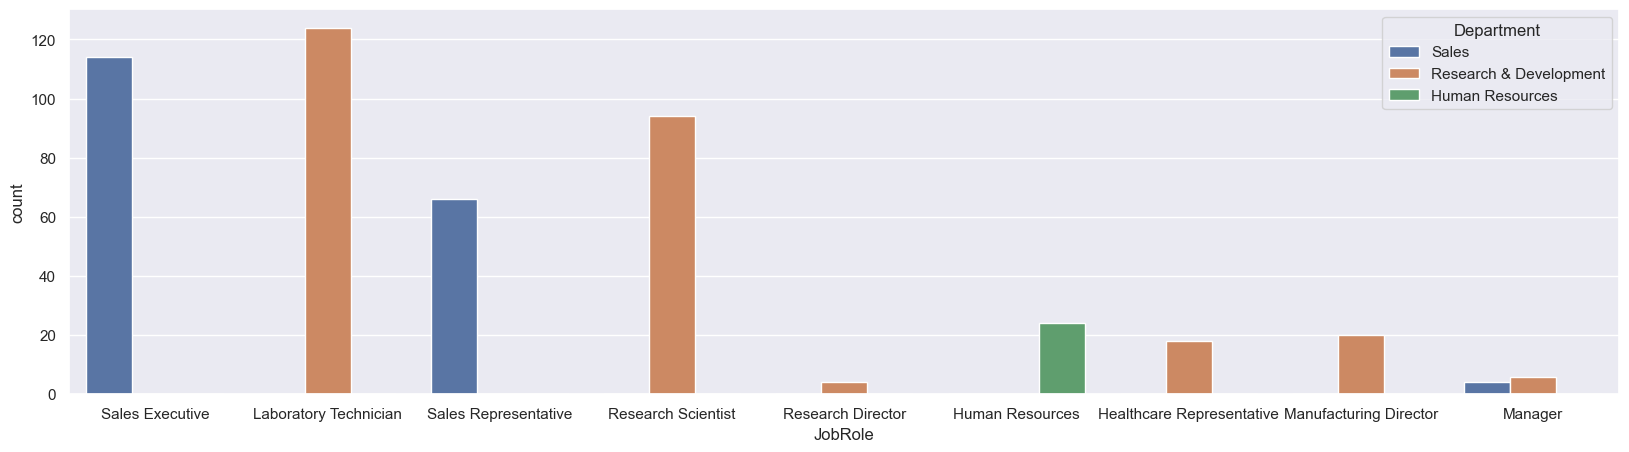

In [145]:
attrition_data=data[data['Attrition']=="Yes"]

sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='JobRole',data=attrition_data,hue='Department')

According to the above chart,the resulted outcome is that most of the employee's designation who left the organization are laboratory technician and sales executive.

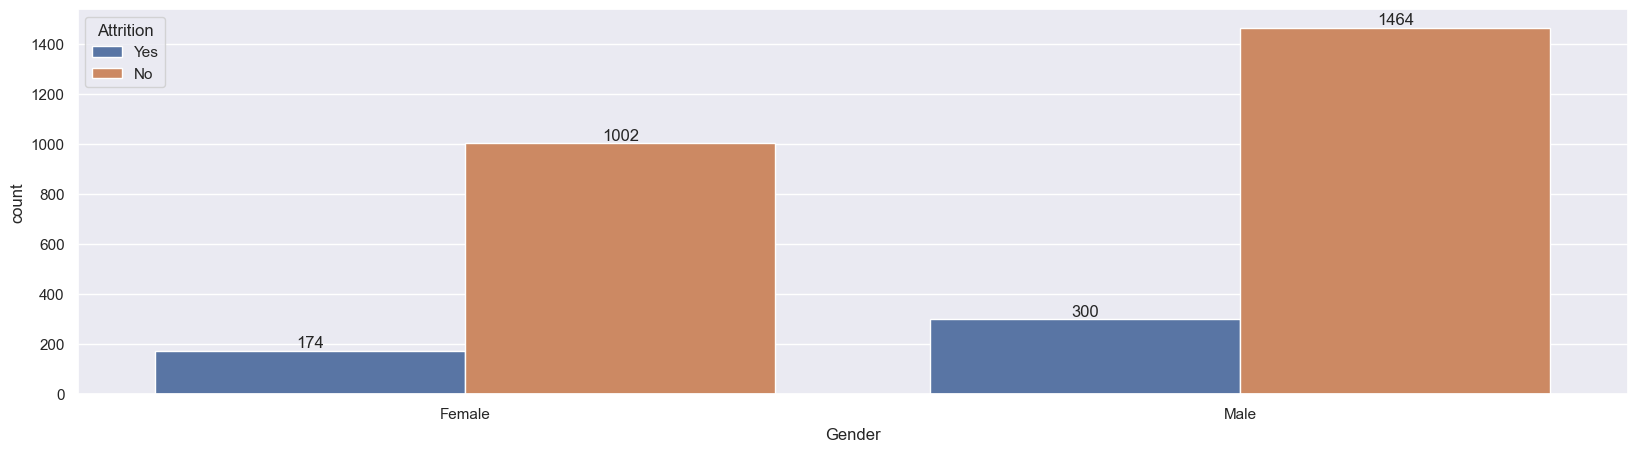

In [146]:
#plotting bar chart to show count of attrition gender wise.
ax=sns.countplot(x='Gender',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that the male attrition level is higher than the female. 

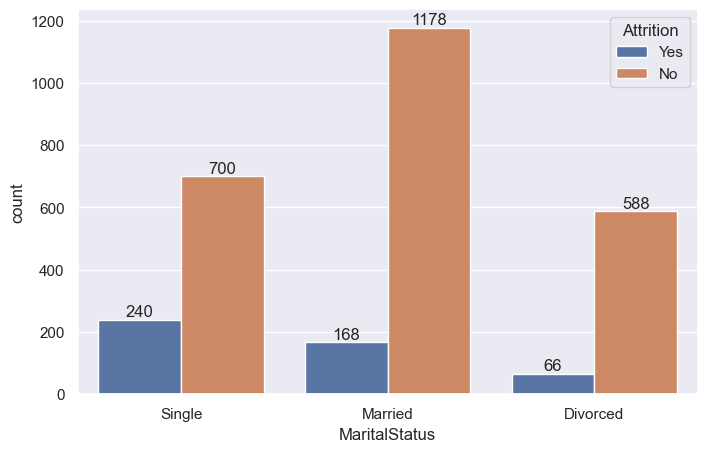

In [147]:
attrition_data=data[data['Attrition']=="Yes"]

sns.set(rc={'figure.figsize':(8,5)})
ax=sns.countplot(x='MaritalStatus',data=data,hue='Attrition')
for bars in ax.containers:
    ax.bar_label(bars)

According to the above chart,the resulted outcome is that single employees attrition rate is high in comparision to married and divorced employees.

## Conclusion of data analysis

From the above analysis we can see that single male employee of age between 26-33 from Research & Development Department ,having monthly income less than 7500,who travel rarely,with low percentage salary hike of 11-13%,with environment satisfaction 1,who were not promoted at all,with life-science educational field and job role as laboratory technician or sales executive are more likely to left the company.

## LABEL ENCODING

In the dataset there are some categorical data,so we have to change them into int data for better accuracy.

In [148]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    else:
        data[column]=LabelEncoder().fit_transform(data[column])

C:\Users\HP\AppData\Local\Temp\ipykernel_6148\3680384905.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_6148\3680384905.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_6148\3680384905.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_6148\3680384905.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
C:\U

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

## SPLITTING DATA TO TRAINING AND TESTING

In [151]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [153]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

## MODEL EXECUTION
### RANDOM FOREST CLASSIFIER

In [154]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV

In [100]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [9,10,11,12],
              'n_estimators':[10,20,50,100,200],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini','entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1600 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'n_estimators': 50}
Time taken in grid search:  477.53


In [155]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 12,
                 min_samples_leaf=1,min_samples_split=2)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                       random_state=42)

In [156]:
fit_rf.set_params(n_estimators=50,
                  bootstrap = True,
                  warm_start=False,
                 oob_score=True)


RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                       n_estimators=50, oob_score=True, random_state=42)

## Train the RandomForest

In [157]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                       n_estimators=50, oob_score=True, random_state=42)

In [158]:
fit_rf.score(x_train, y_train)

0.9991496598639455

## Variable importance

<Axes: >

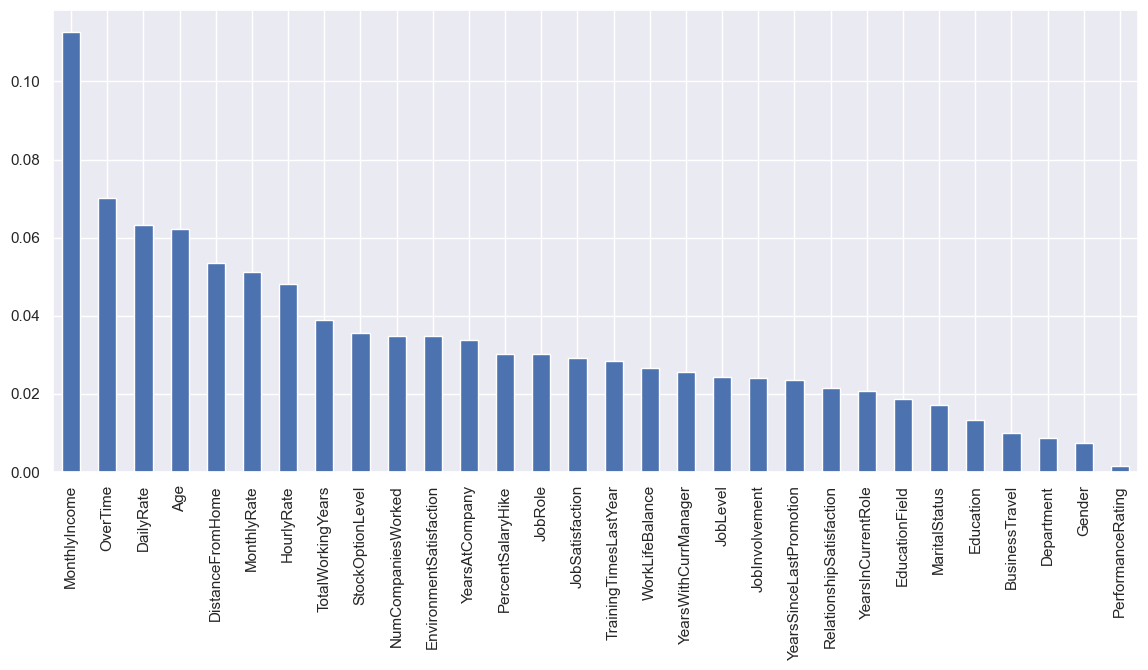

In [159]:
pd.Series(fit_rf.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(14,6))

## PREDICTION

In [160]:
y_pred=fit_rf.predict(x_test)


## CONFUSION MATRIX

In [162]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[487,   2],
       [ 19,  80]], dtype=int64)

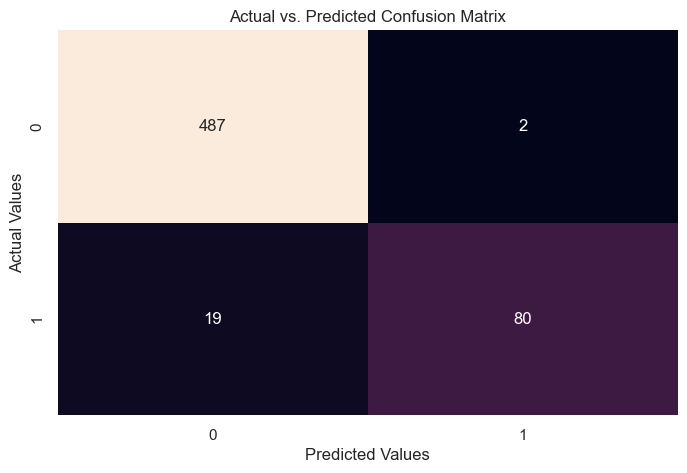

In [163]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## ACCURACY

In [164]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score


In [165]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy=',accuracy)
precision=precision_score(y_test,y_pred)
print('precision =',precision)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

accuracy= 0.9642857142857143
precision = 0.975609756097561
recall= 0.8080808080808081


## ERROR RATE

In [166]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0357


## Area Under Curve (AUC)

In [167]:
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr2, tpr2,_ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [168]:
auc=auc(fpr2,tpr2)
auc

0.9805002995187043

In [169]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\HP\AppData\Local\Temp\ipykernel_6148\4218753862.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\HP\AppData\Local\Temp\ipykernel_6148\4218753862.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


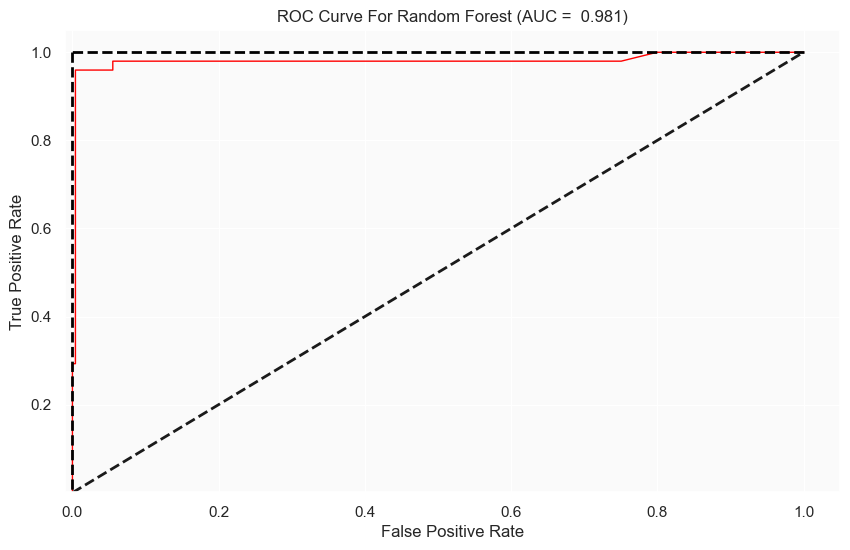

In [170]:
plot_roc_curve(fpr2, tpr2, auc, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification Report

In [171]:
class_report = classification_report(y_test,y_pred,)
print(f'classification_report:\n{class_report}')

classification_report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       489
           1       0.98      0.81      0.88        99

    accuracy                           0.96       588
   macro avg       0.97      0.90      0.93       588
weighted avg       0.96      0.96      0.96       588

